In [192]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

In [193]:
base_path = "/kaggle/input/us-top-10-cities-electricity-and-weather-data"


Read CLEANED Data

In [194]:
cleaned_subregion = pd.read_csv(f"{base_path}/cleaned_subregion_data.csv")
bal = pd.read_csv(f"{base_path}/cleaned_balance_data.csv")

In [195]:
cleaned_subregion.head()

,company,region,demand,local_time,utc_time,city
0,NYIS,ZONJ,7269.0,2018-07-01 01:00:00,2018-07-01 05:00:00,nyc
1,NYIS,ZONJ,6977.0,2018-07-01 02:00:00,2018-07-01 06:00:00,nyc
2,NYIS,ZONJ,6725.0,2018-07-01 03:00:00,2018-07-01 07:00:00,nyc
3,NYIS,ZONJ,6539.0,2018-07-01 04:00:00,2018-07-01 08:00:00,nyc
4,NYIS,ZONJ,6415.0,2018-07-01 05:00:00,2018-07-01 09:00:00,nyc


Read CITY JSON Weather Data

In [196]:
city_weather_data = {}
city_files = [
    "dallas.json", "houston.json", "la.json", "nyc.json", "philadelphia.json",
    "phoenix.json", "san_antonio.json", "san_diego.json", "san_jose.json", "seattle.json"
]

for city_file in city_files:
    city_name = city_file.replace('.json', '')
    df = pd.read_json(f"{base_path}/{city_file}")
    
    # Convert 'time' from UNIX timestamp (seconds) to datetime
    df['time'] = pd.to_datetime(df['time'], unit='s', errors='coerce')
    
    # Add city name
    df['city'] = city_name
    city_weather_data[city_name] = df

# Combine all cities into one DataFrame
combined_weather_data = pd.concat(city_weather_data.values(), ignore_index=True)


In [197]:
# Print the first few rows of the weather data for Dallas
city_weather_data['dallas'].head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone,precipAccumulation,city
0,2018-07-02 05:00:00,Clear,clear-night,0.0,0.0,89.56,91.71,65.31,0.45,1011.9,10.84,12.40,164.0,0.06,0.0,9.617,NaN,NaN,NaN,dallas
1,2018-07-02 06:00:00,Clear,clear-night,0.0,0.0,88.35,92.26,68.29,0.52,1012.7,9.94,9.94,179.0,0.04,0.0,9.817,NaN,NaN,NaN,dallas
2,2018-07-02 07:00:00,Clear,clear-night,0.0,0.0,87.05,91.45,69.26,0.56,1012.8,8.92,10.31,186.0,0.04,0.0,9.510,NaN,NaN,NaN,dallas
3,2018-07-02 08:00:00,Clear,clear-night,0.0,0.0,86.04,90.51,69.61,0.58,1012.7,8.47,8.47,189.0,0.18,0.0,9.617,NaN,NaN,NaN,dallas
4,2018-07-02 09:00:00,Clear,clear-night,0.0,0.0,84.80,89.74,70.68,0.63,1012.9,5.61,5.61,193.0,0.15,0.0,9.617,NaN,NaN,NaN,dallas


In [198]:
all_weather_data = []


for city_name, city_df in city_weather_data.items():
    city_df['city'] = city_name
    
    all_weather_data.append(city_df)


combined_weather_data = pd.concat(all_weather_data, ignore_index=True)


print(combined_weather_data.info())
combined_weather_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165740 entries, 0 to 165739
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 165740 non-null  datetime64[ns]
 1   summary              165463 non-null  object        
 2   icon                 165461 non-null  object        
 3   precipIntensity      165510 non-null  float64       
 4   precipProbability    165510 non-null  float64       
 5   temperature          165730 non-null  float64       
 6   apparentTemperature  165730 non-null  float64       
 7   dewPoint             165740 non-null  float64       
 8   humidity             165730 non-null  float64       
 9   pressure             165690 non-null  float64       
 10  windSpeed            165687 non-null  float64       
 11  windGust             165537 non-null  float64       
 12  windBearing          165685 non-null  float64       
 13  cloudCover    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone,precipAccumulation,city
0,2018-07-02 05:00:00,Clear,clear-night,0.0,0.0,89.56,91.71,65.31,0.45,1011.9,10.84,12.40,164.0,0.06,0.0,9.617,NaN,NaN,NaN,dallas
1,2018-07-02 06:00:00,Clear,clear-night,0.0,0.0,88.35,92.26,68.29,0.52,1012.7,9.94,9.94,179.0,0.04,0.0,9.817,NaN,NaN,NaN,dallas
2,2018-07-02 07:00:00,Clear,clear-night,0.0,0.0,87.05,91.45,69.26,0.56,1012.8,8.92,10.31,186.0,0.04,0.0,9.510,NaN,NaN,NaN,dallas
3,2018-07-02 08:00:00,Clear,clear-night,0.0,0.0,86.04,90.51,69.61,0.58,1012.7,8.47,8.47,189.0,0.18,0.0,9.617,NaN,NaN,NaN,dallas
4,2018-07-02 09:00:00,Clear,clear-night,0.0,0.0,84.80,89.74,70.68,0.63,1012.9,5.61,5.61,193.0,0.15,0.0,9.617,NaN,NaN,NaN,dallas


In [199]:

print("Column Types of Subregion Data:")
print(cleaned_subregion.dtypes)

print("------------------------------")


print("Column Types of Weather Data:")
print(combined_weather_data.dtypes)

print("------------------------------")

Column Types of Subregion Data:
company        object
region         object
demand        float64
local_time     object
utc_time       object
city           object
dtype: object
------------------------------
Column Types of Weather Data:
time                   datetime64[ns]
summary                        object
icon                           object
precipIntensity               float64
precipProbability             float64
temperature                   float64
apparentTemperature           float64
dewPoint                      float64
humidity                      float64
pressure                      float64
windSpeed                     float64
windGust                      float64
windBearing                   float64
cloudCover                    float64
uvIndex                       float64
visibility                    float64
precipType                     object
ozone                         float64
precipAccumulation            float64
city                           object
d

In [200]:
cleaned_subregion['local_time'] = pd.to_datetime(cleaned_subregion['local_time'])
cleaned_subregion['utc_time'] = pd.to_datetime(cleaned_subregion['utc_time'])
# Verify the conversion
print(cleaned_subregion.dtypes)
print(cleaned_subregion.head())

company               object
region                object
demand               float64
local_time    datetime64[ns]
utc_time      datetime64[ns]
city                  object
dtype: object
  company region  demand          local_time            utc_time city
0    NYIS   ZONJ  7269.0 2018-07-01 01:00:00 2018-07-01 05:00:00  nyc
1    NYIS   ZONJ  6977.0 2018-07-01 02:00:00 2018-07-01 06:00:00  nyc
2    NYIS   ZONJ  6725.0 2018-07-01 03:00:00 2018-07-01 07:00:00  nyc
3    NYIS   ZONJ  6539.0 2018-07-01 04:00:00 2018-07-01 08:00:00  nyc
4    NYIS   ZONJ  6415.0 2018-07-01 05:00:00 2018-07-01 09:00:00  nyc


In [201]:
combined_weather_data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone,precipAccumulation,city
0,2018-07-02 05:00:00,Clear,clear-night,0.0,0.0,89.56,91.71,65.31,0.45,1011.9,10.84,12.40,164.0,0.06,0.0,9.617,NaN,NaN,NaN,dallas
1,2018-07-02 06:00:00,Clear,clear-night,0.0,0.0,88.35,92.26,68.29,0.52,1012.7,9.94,9.94,179.0,0.04,0.0,9.817,NaN,NaN,NaN,dallas
2,2018-07-02 07:00:00,Clear,clear-night,0.0,0.0,87.05,91.45,69.26,0.56,1012.8,8.92,10.31,186.0,0.04,0.0,9.510,NaN,NaN,NaN,dallas
3,2018-07-02 08:00:00,Clear,clear-night,0.0,0.0,86.04,90.51,69.61,0.58,1012.7,8.47,8.47,189.0,0.18,0.0,9.617,NaN,NaN,NaN,dallas
4,2018-07-02 09:00:00,Clear,clear-night,0.0,0.0,84.80,89.74,70.68,0.63,1012.9,5.61,5.61,193.0,0.15,0.0,9.617,NaN,NaN,NaN,dallas


In [202]:
# Split into separate columns
cleaned_subregion['date'] = cleaned_subregion['utc_time'].dt.date
cleaned_subregion['time'] = cleaned_subregion['utc_time'].dt.time

# Drop the local_time column
cleaned_subregion = cleaned_subregion.drop(columns=['local_time'])

# Rename 'utc_time' to 'datetime' (optional) or drop if no longer needed
cleaned_subregion = cleaned_subregion.drop(columns=['utc_time'])

In [203]:
cleaned_subregion.head()

,company,region,demand,city,date,time
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00


In [204]:
weather = combined_weather_data

In [205]:
weather['time'] = pd.to_datetime(weather['time'])

# Split into separate columns
weather['date'] = weather['time'].dt.date
weather['time'] = weather['time'].dt.time

In [206]:
print(weather.dtypes)
print(weather['time'].head())

time                    object
summary                 object
icon                    object
precipIntensity        float64
precipProbability      float64
temperature            float64
apparentTemperature    float64
dewPoint               float64
humidity               float64
pressure               float64
windSpeed              float64
windGust               float64
windBearing            float64
cloudCover             float64
uvIndex                float64
visibility             float64
precipType              object
ozone                  float64
precipAccumulation     float64
city                    object
date                    object
dtype: object
0    05:00:00
1    06:00:00
2    07:00:00
3    08:00:00
4    09:00:00
Name: time, dtype: object


In [207]:
print("Cities in demand data:", cleaned_subregion['city'].unique())
print("Cities in balance data:", bal['city'].unique())

print("Cities in weather data:", weather['city'].unique())


Cities in demand data: ['nyc' 'la' 'houston' 'philadelphia' 'san antonio' 'san diego' 'dallas'
 'san jose']
Cities in balance data: ['phoenix' 'seattle']
Cities in weather data: ['dallas' 'houston' 'la' 'nyc' 'philadelphia' 'phoenix' 'san_antonio'
 'san_diego' 'san_jose' 'seattle']


In [208]:
cleaned_subregion.head()



,company,region,demand,city,date,time
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00


In [209]:
bal.head()


,company,local_time,utc_time,demand,city
0,AZPS,2018-07-01 01:00:00,2018-07-01 08:00:00,3497.0,phoenix
1,AZPS,2018-07-01 02:00:00,2018-07-01 09:00:00,3256.0,phoenix
2,AZPS,2018-07-01 03:00:00,2018-07-01 10:00:00,3065.0,phoenix
3,AZPS,2018-07-01 04:00:00,2018-07-01 11:00:00,2929.0,phoenix
4,AZPS,2018-07-01 05:00:00,2018-07-01 12:00:00,2833.0,phoenix


In [210]:
# Step 1: Convert 'local_time' to datetime
bal['local_time'] = pd.to_datetime(bal['local_time'])

# Step 2: Extract date and time
bal['date'] = bal['local_time'].dt.date
bal['time'] = bal['local_time'].dt.time

# Step 3: Drop unnecessary columns
bal = bal.drop(columns=['local_time', 'utc_time'])

# Step 4: Reorder and rename columns to match cleaned_subregion
bal = bal[['company', 'demand', 'city', 'date', 'time']]
bal['region'] = 'BAL'  # Add 'region' since cleaned_subregion has it

# Reorder columns to match cleaned_subregion
bal = bal[['company', 'region', 'demand', 'city', 'date', 'time']]

# Step 5: Concatenate the two DataFrames
df = pd.concat([cleaned_subregion, bal], ignore_index=True)


In [211]:
df.head()

,company,region,demand,city,date,time
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00


In [212]:
print("Cities in demand data:", df['city'].unique())

print("Cities in weather data:", weather['city'].unique())


Cities in demand data: ['nyc' 'la' 'houston' 'philadelphia' 'san antonio' 'san diego' 'dallas'
 'san jose' 'phoenix' 'seattle']
Cities in weather data: ['dallas' 'houston' 'la' 'nyc' 'philadelphia' 'phoenix' 'san_antonio'
 'san_diego' 'san_jose' 'seattle']


In [213]:
print(df.shape)
weather.shape

(164208, 6)


(165740, 21)

In [214]:
weather.isnull().sum()

time                        0
summary                   277
icon                      279
precipIntensity           230
precipProbability         230
temperature                10
apparentTemperature        10
dewPoint                    0
humidity                   10
pressure                   50
windSpeed                  53
windGust                  203
windBearing                55
cloudCover                240
uvIndex                   175
visibility                172
precipType              87135
ozone                   20202
precipAccumulation     163637
city                        0
date                        0
dtype: int64

In [215]:
weather.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone,precipAccumulation,city,date
0,05:00:00,Clear,clear-night,0.0,0.0,89.56,91.71,65.31,0.45,1011.9,...,12.40,164.0,0.06,0.0,9.617,NaN,NaN,NaN,dallas,2018-07-02
1,06:00:00,Clear,clear-night,0.0,0.0,88.35,92.26,68.29,0.52,1012.7,...,9.94,179.0,0.04,0.0,9.817,NaN,NaN,NaN,dallas,2018-07-02
2,07:00:00,Clear,clear-night,0.0,0.0,87.05,91.45,69.26,0.56,1012.8,...,10.31,186.0,0.04,0.0,9.510,NaN,NaN,NaN,dallas,2018-07-02
3,08:00:00,Clear,clear-night,0.0,0.0,86.04,90.51,69.61,0.58,1012.7,...,8.47,189.0,0.18,0.0,9.617,NaN,NaN,NaN,dallas,2018-07-02
4,09:00:00,Clear,clear-night,0.0,0.0,84.80,89.74,70.68,0.63,1012.9,...,5.61,193.0,0.15,0.0,9.617,NaN,NaN,NaN,dallas,2018-07-02


In [216]:
print("Columns of Weather data:\n")
print(weather.columns)

print("Columns of Demand data:\n")
print(df.columns)

Columns of Weather data:

Index(['time', 'summary', 'icon', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'pressure', 'windSpeed', 'windGust', 'windBearing', 'cloudCover',
       'uvIndex', 'visibility', 'precipType', 'ozone', 'precipAccumulation',
       'city', 'date'],
      dtype='object')
Columns of Demand data:

Index(['company', 'region', 'demand', 'city', 'date', 'time'], dtype='object')


In [217]:
# Ensure date and time columns are of the same type in both DataFrames
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'].astype(str)).dt.time

weather['date'] = pd.to_datetime(weather['date'])
weather['time'] = pd.to_datetime(weather['time'].astype(str)).dt.time

# Merge on 'city', 'date', and 'time'
merged = pd.merge(df, weather, on=['city', 'date', 'time'], how='left')


/tmp/ipykernel_31/124973028.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'].astype(str)).dt.time
/tmp/ipykernel_31/124973028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather['time'] = pd.to_datetime(weather['time'].astype(str)).dt.time


In [218]:
merged.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,company,region,demand,city,date,time,summary,icon,precipIntensity,precipProbability,...,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone,precipAccumulation
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
# Check if any missing values remain
print(merged.isnull().sum())
print(merged.head())
print(merged.shape)



company                     0
region                      0
demand                  26048
city                        0
date                        0
time                        0
summary                 49976
icon                    49978
precipIntensity         49943
precipProbability       49943
temperature             49789
apparentTemperature     49789
dewPoint                49782
humidity                49789
pressure                49815
windSpeed               49819
windGust                49908
windBearing             49820
cloudCover              49950
uvIndex                 49905
visibility              49902
precipType             103818
ozone                   63912
precipAccumulation     162120
dtype: int64
  company region  demand city       date      time summary icon  \
0    NYIS   ZONJ  7269.0  nyc 2018-07-01  05:00:00     NaN  NaN   
1    NYIS   ZONJ  6977.0  nyc 2018-07-01  06:00:00     NaN  NaN   
2    NYIS   ZONJ  6725.0  nyc 2018-07-01  07:00:00     NaN  NaN   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [220]:
print(merged['city'].unique())


['nyc' 'la' 'houston' 'philadelphia' 'san antonio' 'san diego' 'dallas'
 'san jose' 'phoenix' 'seattle']


In [221]:
# Impute missing demand values with the median (for example, for the demand columns)
merged['demand'].fillna(merged['demand'].median(), inplace=True)

# Impute missing weather data (e.g., precipType, ozone) with the mode or another approach
merged['precipType'].fillna(merged['precipType'].mode()[0], inplace=True)
merged['ozone'].fillna(merged['ozone'].median(), inplace=True)

# Check the cleaned data
print(merged.info())


/tmp/ipykernel_31/1361644870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['demand'].fillna(merged['demand'].median(), inplace=True)
/tmp/ipykernel_31/1361644870.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164208 entries, 0 to 164207
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company              164208 non-null  object        
 1   region               164208 non-null  object        
 2   demand               164208 non-null  float64       
 3   city                 164208 non-null  object        
 4   date                 164208 non-null  datetime64[ns]
 5   time                 164208 non-null  object        
 6   summary              114232 non-null  object        
 7   icon                 114230 non-null  object        
 8   precipIntensity      114265 non-null  float64       
 9   precipProbability    114265 non-null  float64       
 10  temperature          114419 non-null  float64       
 11  apparentTemperature  114419 non-null  float64       
 12  dewPoint             114426 non-null  float64       
 13  humidity      

In [222]:
merged.isnull().sum()

company                     0
region                      0
demand                      0
city                        0
date                        0
time                        0
summary                 49976
icon                    49978
precipIntensity         49943
precipProbability       49943
temperature             49789
apparentTemperature     49789
dewPoint                49782
humidity                49789
pressure                49815
windSpeed               49819
windGust                49908
windBearing             49820
cloudCover              49950
uvIndex                 49905
visibility              49902
precipType                  0
ozone                       0
precipAccumulation     162120
dtype: int64

In [223]:
print(weather['precipIntensity'].skew())  # > 1 or < -1 means high skew
print(weather['precipProbability'].skew())  # > 1 or < -1 means high skew

17.950493935876718
3.679966865433129


In [224]:
# For other numerical columns, impute with the median 
numerical_cols = ['precipIntensity', 'precipProbability', 'temperature', 'apparentTemperature', 
                  'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing', 
                  'cloudCover', 'uvIndex', 'visibility', 'ozone', 'precipAccumulation']

for col in numerical_cols:
    merged[col].fillna(merged[col].median(), inplace=True)
    
# Impute missing values in 'summary' and 'icon' with the most frequent value (mode)
merged['summary'].fillna(merged['summary'].mode()[0], inplace=True)
merged['icon'].fillna(merged['icon'].mode()[0], inplace=True)




/tmp/ipykernel_31/2114166900.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(merged[col].median(), inplace=True)
/tmp/ipykernel_31/2114166900.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Dropped becaue 98% column is empty

In [225]:
merged.drop(columns=['precipAccumulation'], inplace=True)


In [226]:
merged.isnull().sum()

company                0
region                 0
demand                 0
city                   0
date                   0
time                   0
summary                0
icon                   0
precipIntensity        0
precipProbability      0
temperature            0
apparentTemperature    0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
cloudCover             0
uvIndex                0
visibility             0
precipType             0
ozone                  0
dtype: int64

In [227]:
merged.to_csv("/kaggle/working/merged_cleaned_inital.csv", index=False)


Feature Extraction

In [228]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164208 entries, 0 to 164207
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company              164208 non-null  object        
 1   region               164208 non-null  object        
 2   demand               164208 non-null  float64       
 3   city                 164208 non-null  object        
 4   date                 164208 non-null  datetime64[ns]
 5   time                 164208 non-null  object        
 6   summary              164208 non-null  object        
 7   icon                 164208 non-null  object        
 8   precipIntensity      164208 non-null  float64       
 9   precipProbability    164208 non-null  float64       
 10  temperature          164208 non-null  float64       
 11  apparentTemperature  164208 non-null  float64       
 12  dewPoint             164208 non-null  float64       
 13  humidity      

In [229]:
merged.head()

,company,region,demand,city,date,time,summary,icon,precipIntensity,precipProbability,...,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,ozone
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00,Clear,clear-night,0.0003,0.01,...,0.68,1015.9,5.1,8.28,173.0,0.31,0.0,10.0,rain,299.5
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00,Clear,clear-night,0.0003,0.01,...,0.68,1015.9,5.1,8.28,173.0,0.31,0.0,10.0,rain,299.5
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00,Clear,clear-night,0.0003,0.01,...,0.68,1015.9,5.1,8.28,173.0,0.31,0.0,10.0,rain,299.5
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00,Clear,clear-night,0.0003,0.01,...,0.68,1015.9,5.1,8.28,173.0,0.31,0.0,10.0,rain,299.5
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00,Clear,clear-night,0.0003,0.01,...,0.68,1015.9,5.1,8.28,173.0,0.31,0.0,10.0,rain,299.5


In [230]:
merged['datetime'] = pd.to_datetime(merged['date'].astype(str) + ' ' + merged['time'].astype(str))


In [231]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164208 entries, 0 to 164207
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company              164208 non-null  object        
 1   region               164208 non-null  object        
 2   demand               164208 non-null  float64       
 3   city                 164208 non-null  object        
 4   date                 164208 non-null  datetime64[ns]
 5   time                 164208 non-null  object        
 6   summary              164208 non-null  object        
 7   icon                 164208 non-null  object        
 8   precipIntensity      164208 non-null  float64       
 9   precipProbability    164208 non-null  float64       
 10  temperature          164208 non-null  float64       
 11  apparentTemperature  164208 non-null  float64       
 12  dewPoint             164208 non-null  float64       
 13  humidity      

In [232]:
merged['datetime'] = pd.to_datetime(merged['date'].astype(str) + ' ' + merged['time'].astype(str))


In [233]:
# Extract time-based features
merged['hour'] = merged['datetime'].dt.hour
merged['day_of_week'] = merged['datetime'].dt.dayofweek
merged['month'] = merged['datetime'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

merged['season'] = merged['month'].apply(get_season)

# Check result
print(merged[['hour', 'day_of_week', 'month', 'season']].head())


   hour  day_of_week  month  season
0     5            6      7  summer
1     6            6      7  summer
2     7            6      7  summer
3     8            6      7  summer
4     9            6      7  summer


Scaling

In [234]:
from sklearn.preprocessing import MinMaxScaler

# Features to scale (excluding target like demand)
numeric_features = [
    'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure',
    'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex',
    'visibility', 'ozone', 'precipIntensity', 'precipProbability'
]

# Initialize scaler and fit-transform
scaler = MinMaxScaler()
merged[numeric_features] = scaler.fit_transform(merged[numeric_features])

# Optional: check scaled summary
print(merged[numeric_features].describe().T)


                        count      mean       std  min       25%       50%  \
temperature          164208.0  0.532916  0.128626  0.0  0.470077  0.531734   
apparentTemperature  164208.0  0.597158  0.123956  0.0  0.545122  0.597365   
dewPoint             164208.0  0.767383  0.096357  0.0  0.722649  0.768977   
humidity             164208.0  0.656510  0.189580  0.0  0.580000  0.680000   
pressure             164208.0  0.604382  0.084520  0.0  0.566616  0.598775   
windSpeed            164208.0  0.208390  0.105912  0.0  0.147619  0.186813   
windGust             164208.0  0.182232  0.107841  0.0  0.120699  0.157385   
windBearing          164208.0  0.483849  0.232264  0.0  0.387187  0.481894   
cloudCover           164208.0  0.372678  0.294648  0.0  0.150000  0.310000   
uvIndex              164208.0  0.077670  0.166723  0.0  0.000000  0.000000   
visibility           164208.0  0.968958  0.116156  0.0  1.000000  1.000000   
ozone                164208.0  0.356805  0.111052  0.0  0.316370

**Daily Aggregation**

In [235]:
# Compute daily means per city
daily_summary = merged.groupby(['city', 'date']).agg({
    'demand': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'windSpeed': 'mean',
    'precipIntensity': 'mean',
    'uvIndex': 'mean'
}).reset_index()

print(daily_summary.head())


     city       date  demand  temperature  humidity  windSpeed  \
0  dallas 2018-07-01  5473.0     0.531734  0.680000   0.186813   
1  dallas 2018-07-02  5473.0     0.728173  0.547083   0.252915   
2  dallas 2018-07-03  5473.0     0.792719  0.449583   0.244460   
3  dallas 2018-07-04  5473.0     0.746175  0.566667   0.283715   
4  dallas 2018-07-05  5473.0     0.728437  0.617083   0.226068   

   precipIntensity   uvIndex  
0         0.000242  0.000000  
1         0.000050  0.239583  
2         0.000091  0.250000  
3         0.000000  0.184028  
4         0.000000  0.211806  


***Weekly Aggregation***

In [236]:
merged['week'] = merged['datetime'].dt.isocalendar().week


weekly_summary = merged.groupby(['city', 'week']).agg({
    'demand': 'mean',
    'temperature': 'mean',
    'humidity': 'mean'
}).reset_index()


print(weekly_summary.head())


     city  week       demand  temperature  humidity
0  dallas     1  8842.785714     0.396143  0.672827
1  dallas     2  8805.514881     0.440492  0.646845
2  dallas     3  8551.431548     0.428271  0.777173
3  dallas     4  9076.758929     0.394335  0.653750
4  dallas     5  9000.175595     0.422941  0.699583


Anomaly and Error Detection

In [237]:
merged.head()

,company,region,demand,city,date,time,summary,icon,precipIntensity,precipProbability,...,uvIndex,visibility,precipType,ozone,datetime,hour,day_of_week,month,season,week
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00,Clear,clear-night,0.000242,0.01,...,0.0,1.0,rain,0.341637,2018-07-01 05:00:00,5,6,7,summer,26
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00,Clear,clear-night,0.000242,0.01,...,0.0,1.0,rain,0.341637,2018-07-01 06:00:00,6,6,7,summer,26
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00,Clear,clear-night,0.000242,0.01,...,0.0,1.0,rain,0.341637,2018-07-01 07:00:00,7,6,7,summer,26
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00,Clear,clear-night,0.000242,0.01,...,0.0,1.0,rain,0.341637,2018-07-01 08:00:00,8,6,7,summer,26
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00,Clear,clear-night,0.000242,0.01,...,0.0,1.0,rain,0.341637,2018-07-01 09:00:00,9,6,7,summer,26


In [238]:
from scipy.stats import zscore

# Compute z-scores for demand
merged['demand_zscore'] = zscore(merged['demand'])

# Flag anomalies where z-score > 3 or < -3
merged['demand_anomaly'] = merged['demand_zscore'].abs() > 3

# Count of anomalies
print(merged['demand_anomaly'].sum())


1352


In [239]:
# IQR for demand
Q1 = merged['demand'].quantile(0.25)
Q3 = merged['demand'].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag IQR-based anomalies
merged['demand_anomaly_iqr'] = ~merged['demand'].between(lower_bound, upper_bound)

print(merged['demand_anomaly_iqr'].sum())


1208


In [240]:
from sklearn.ensemble import IsolationForest

# Select numeric features
anomaly_features = ['demand', 'temperature', 'humidity', 'windSpeed']

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
merged['anomaly_iso'] = iso_forest.fit_predict(merged[anomaly_features])

# -1 indicates anomaly
merged['anomaly_iso'] = merged['anomaly_iso'] == -1
print(merged['anomaly_iso'].sum())


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


1643


In [241]:
merged.columns

Index(['company', 'region', 'demand', 'city', 'date', 'time', 'summary',
       'icon', 'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 'windSpeed',
       'windGust', 'windBearing', 'cloudCover', 'uvIndex', 'visibility',
       'precipType', 'ozone', 'datetime', 'hour', 'day_of_week', 'month',
       'season', 'week', 'demand_zscore', 'demand_anomaly',
       'demand_anomaly_iqr', 'anomaly_iso'],
      dtype='object')

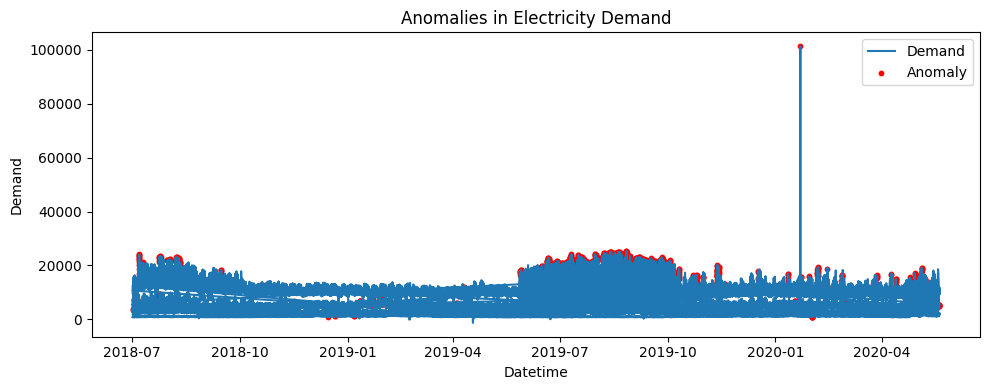

In [242]:
plt.figure(figsize=(10, 4))
plt.plot(merged['datetime'], merged['demand'], label='Demand')
plt.scatter(merged[merged['anomaly_iso']]['datetime'],
            merged[merged['anomaly_iso']]['demand'],
            color='red', label='Anomaly', s=10)
plt.legend()
plt.title('Anomalies in Electricity Demand')
plt.xlabel('Datetime')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()


In [243]:
# Remove rows flagged by any method
merged_cleaned = merged[~merged['anomaly_iso']]


print(merged_cleaned.shape)


(162565, 33)


In [244]:
print(merged['anomaly_iso'].unique())


[False  True]


In [245]:
merged_cleaned.head()

,company,region,demand,city,date,time,summary,icon,precipIntensity,precipProbability,...,datetime,hour,day_of_week,month,season,week,demand_zscore,demand_anomaly,demand_anomaly_iqr,anomaly_iso
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 05:00:00,5,6,7,summer,26,0.188946,False,False,False
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 06:00:00,6,6,7,summer,26,0.120149,False,False,False
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 07:00:00,7,6,7,summer,26,0.060775,False,False,False
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 08:00:00,8,6,7,summer,26,0.016952,False,False,False
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 09:00:00,9,6,7,summer,26,-0.012263,False,False,False


In [246]:
merged.head()

,company,region,demand,city,date,time,summary,icon,precipIntensity,precipProbability,...,datetime,hour,day_of_week,month,season,week,demand_zscore,demand_anomaly,demand_anomaly_iqr,anomaly_iso
0,NYIS,ZONJ,7269.0,nyc,2018-07-01,05:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 05:00:00,5,6,7,summer,26,0.188946,False,False,False
1,NYIS,ZONJ,6977.0,nyc,2018-07-01,06:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 06:00:00,6,6,7,summer,26,0.120149,False,False,False
2,NYIS,ZONJ,6725.0,nyc,2018-07-01,07:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 07:00:00,7,6,7,summer,26,0.060775,False,False,False
3,NYIS,ZONJ,6539.0,nyc,2018-07-01,08:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 08:00:00,8,6,7,summer,26,0.016952,False,False,False
4,NYIS,ZONJ,6415.0,nyc,2018-07-01,09:00:00,Clear,clear-night,0.000242,0.01,...,2018-07-01 09:00:00,9,6,7,summer,26,-0.012263,False,False,False


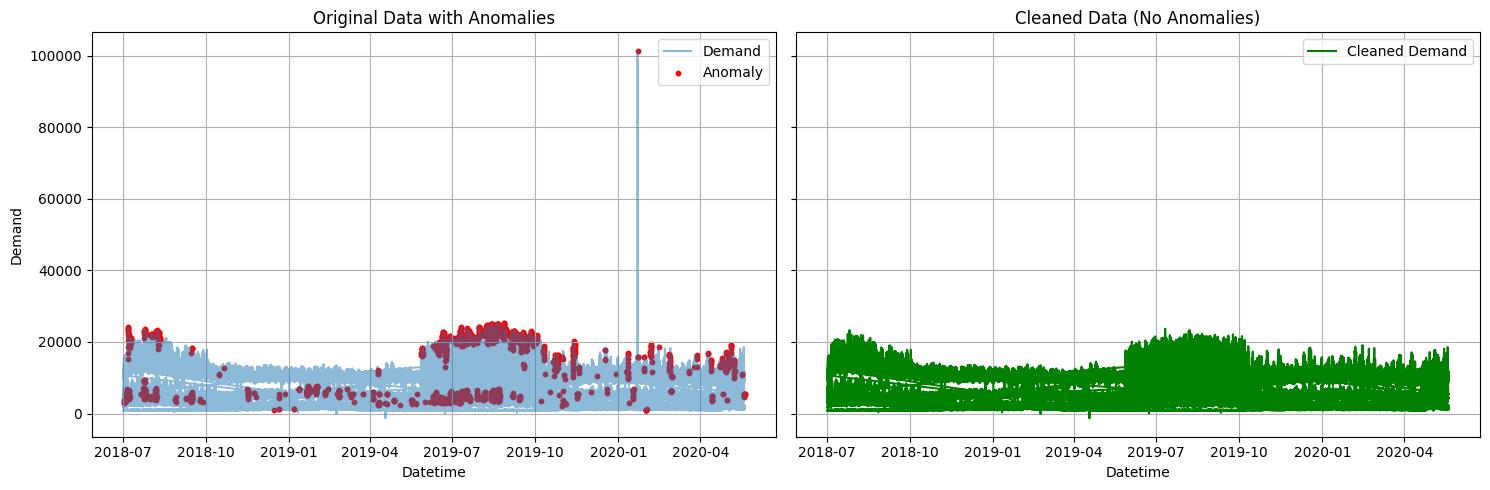

In [247]:
import matplotlib.pyplot as plt

# Create figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot original data with anomalies highlighted
axes[0].plot(merged['datetime'], merged['demand'], label='Demand', alpha=0.5)
axes[0].scatter(merged[merged['anomaly_iso']]['datetime'],
                merged[merged['anomaly_iso']]['demand'],
                color='red', label='Anomaly', s=10)
axes[0].set_title('Original Data with Anomalies')
axes[0].set_xlabel('Datetime')
axes[0].set_ylabel('Demand')
axes[0].legend()
axes[0].grid(True)

# Plot cleaned data without anomalies
axes[1].plot(merged_cleaned['datetime'], merged_cleaned['demand'], color='green', label='Cleaned Demand')
axes[1].set_title('Cleaned Data (No Anomalies)')
axes[1].set_xlabel('Datetime')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [248]:
merged_cleaned.to_csv("/kaggle/working/merged_cleaned_without_anomalies.csv", index=False)

In [249]:
merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162565 entries, 0 to 164207
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company              162565 non-null  object        
 1   region               162565 non-null  object        
 2   demand               162565 non-null  float64       
 3   city                 162565 non-null  object        
 4   date                 162565 non-null  datetime64[ns]
 5   time                 162565 non-null  object        
 6   summary              162565 non-null  object        
 7   icon                 162565 non-null  object        
 8   precipIntensity      162565 non-null  float64       
 9   precipProbability    162565 non-null  float64       
 10  temperature          162565 non-null  float64       
 11  apparentTemperature  162565 non-null  float64       
 12  dewPoint             162565 non-null  float64       
 13  humidity           

# Clustering

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [251]:
# Define the features to use
features = [
    'temperature', 'apparentTemperature', 'dewPoint', 'humidity', 'pressure', 
    'windSpeed', 'windGust', 'windBearing', 'cloudCover', 'uvIndex', 'visibility',
    'precipIntensity', 'precipProbability', 'ozone', 'demand', 'demand_zscore', 
    'demand_anomaly', 'demand_anomaly_iqr', 'anomaly_iso', 
    'hour', 'day_of_week', 'month'
]

In [252]:
# Select the features for PCA
X = merged_cleaned[features]

# Normalize the data using StandardScaler
scalerPCA = StandardScaler()
X_scaled = scalerPCA.fit_transform(X)


In [253]:
# Apply PCA to reduce the data to 2 dimensions (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


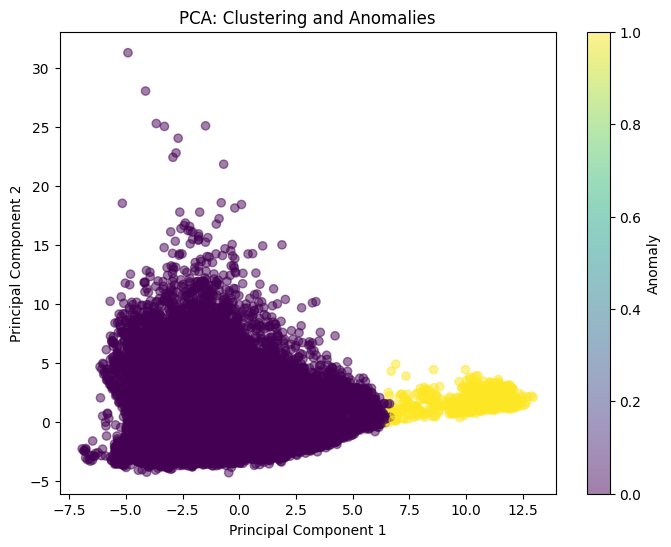

In [254]:
# Visualize the PCA results with clusters or anomalies
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=merged_cleaned['demand_anomaly'], cmap='viridis', alpha=0.5)
plt.title('PCA: Clustering and Anomalies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Anomaly')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

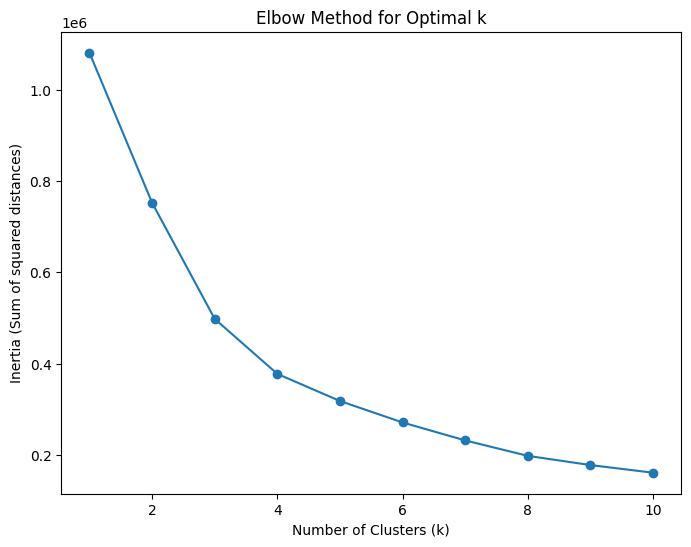

In [255]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering on PCA-reduced data (2D)
X = pca_df[['PC1', 'PC2']]  # Using PCA components for clustering

# Calculate the sum of squared distances for different k values
inertia = []
for k in range(1, 11):  # Try values from k=1 to k=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to determine optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_31/3761608205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['kmeans_cluster'] = kmeans.fit_predict(X)


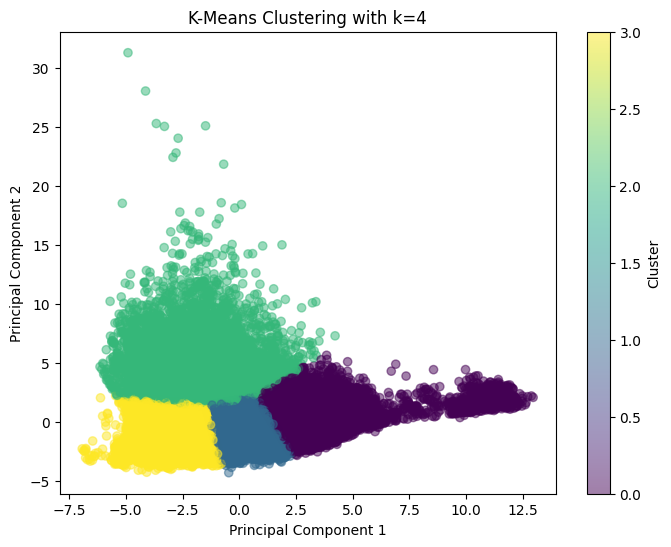

In [256]:
# Apply KMeans clustering on PCA-reduced data with k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_cleaned['kmeans_cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=merged_cleaned['kmeans_cluster'], cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [257]:
# from sklearn.cluster import DBSCAN

# # Apply DBSCAN clustering on PCA-reduced data
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# merged['dbscan_cluster'] = dbscan.fit_predict(X)

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=merged['dbscan_cluster'], cmap='viridis', alpha=0.5)
# plt.title('DBSCAN Clustering')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()


In [258]:
score = silhouette_score(X, merged_cleaned['kmeans_cluster'])
print(f"Silhouette Score (K-Means, k={optimal_k}):", round(score, 3))


Silhouette Score (K-Means, k=4): 0.413


In [259]:
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score

# # Apply Gaussian Mixture Model (GMM)
# gmm = GaussianMixture(n_components=4, random_state=42)  # You can change n_components
# merged['gmm_cluster'] = gmm.fit_predict(X)

# # Evaluate Silhouette Score for GMM
# gmm_score = silhouette_score(X, merged['gmm_cluster'])
# print(f'Silhouette Score for GMM: {gmm_score}')

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=merged['gmm_cluster'], cmap='viridis', alpha=0.5)
# plt.title('Gaussian Mixture Model Clustering')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()


In [260]:
# Group by clusters to interpret
cluster_summary = merged_cleaned.groupby('kmeans_cluster')[[
    'demand', 'temperature', 'humidity', 'hour'
]].mean()

print(cluster_summary)


                      demand  temperature  humidity       hour
kmeans_cluster                                                
0               10070.587702     0.706561  0.600085  12.734202
1                6260.193943     0.538224  0.640336  11.335800
2                5457.516188     0.483839  0.873326  11.452475
3                3670.285201     0.357250  0.663030  10.674457


# Predictive Modelling

Problem Formulation
We will forecast hourly electricity demand for the next day based on:

Weather variables (temperature, humidity, etc.)

Time-related features (hour of day, day of week, month)

Forecasting Horizon:
The goal is to predict 24 hours ahead

In [261]:
# Prepare feature matrix and target variable
features = ['temperature', 'humidity', 'windSpeed', 'pressure', 'hour', 'day_of_week', 'month', 'kmeans_cluster']
target = 'demand'

# Create feature matrix X and target vector y
X = merged_cleaned[features]
y = merged_cleaned[target]

# Split the data into train/test sets based on the date (last 10% as test data)
train_size = int(0.9 * len(merged))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [262]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MAE and RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}')


Random Forest - MAE: 3747.4240554709586, RMSE: 4084.872302601203


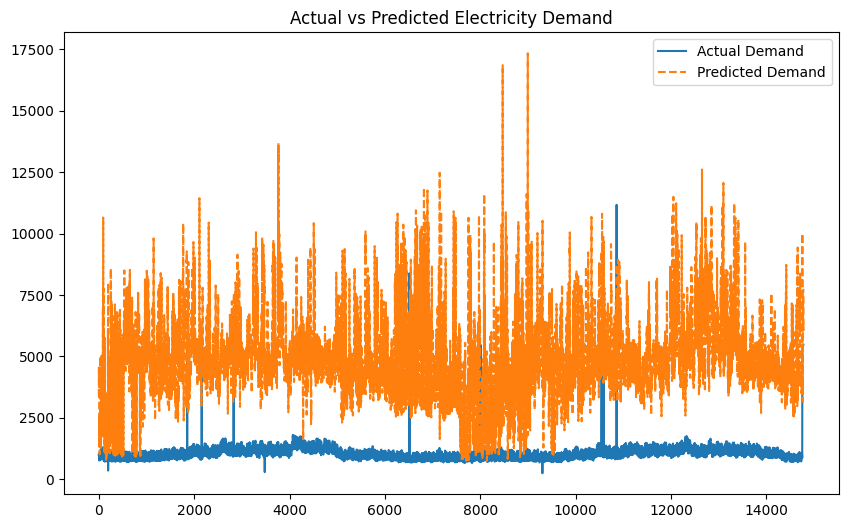

In [263]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Demand')
plt.plot(y_pred_rf, label='Predicted Demand', linestyle='--')
plt.title('Actual vs Predicted Electricity Demand')
plt.legend()
plt.show()


In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model using MAE and RMSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f'Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}')


Linear Regression - MAE: 3780.604714792187, RMSE: 4113.338580192692


In [265]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize XGBoost Regressor
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = xg_model.predict(X_test)

# Evaluate the model using MAE and RMSE
mae_xg = mean_absolute_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))

print(f'XGBoost - MAE: {mae_xg}, RMSE: {rmse_xg}')


XGBoost - MAE: 3822.768183342803, RMSE: 4124.647551142536


In [266]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the demand (and other numeric features if needed)
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the demand values for training LSTM
merged_cleaned['demand_scaled'] = scaler.fit_transform(merged_cleaned[['demand']])

# Now the 'demand_scaled' will be used for training the LSTM


/tmp/ipykernel_31/89164271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_cleaned['demand_scaled'] = scaler.fit_transform(merged_cleaned[['demand']])


In [267]:
import numpy as np

# Create dataset with a look-back window
def create_dataset(df, look_back=24):
    X, y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:i + look_back])  # Use previous `look_back` values for prediction
        y.append(df[i + look_back])    # The value we're trying to predict (next time step)
    return np.array(X), np.array(y)

# Prepare data with a look-back of 24 hours
look_back = 24  # You can experiment with different values
X, y = create_dataset(merged_cleaned['demand_scaled'].values, look_back)

# Reshape X to be compatible with LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Verify shapes
print(X.shape, y.shape)


(162541, 24, 1) (162541,)


In [268]:
# Split into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(merged_cleaned))  # 90% for training, 10% for testing
X_train_lstm, X_test_lstm = X[:train_size], X[train_size:]
y_train_lstm, y_test_lstm = y[:train_size], y[train_size:]

# Verify the shapes after splitting
print(X_train_lstm.shape, X_test_lstm.shape)
print(y_train_lstm.shape, y_test_lstm.shape)


(146308, 24, 1) (16233, 24, 1)
(146308,) (16233,)


In [269]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM Model
LSTMmodel = Sequential()

# Add LSTM layer
LSTMmodel.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
LSTMmodel.add(Dropout(0.2))  # Dropout for regularization to prevent overfitting

# Add Dense layer for output
LSTMmodel.add(Dense(units=1))

# Compile the model
LSTMmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTMmodel.fit(X, y, epochs=10, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1874/2286 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0083

KeyboardInterrupt: 

In [ ]:
# Make predictions
predictions = LSTMmodel.predict(X)

# Inverse transform the predictions to get original demand values
predictions = scaler.inverse_transform(predictions)
y_test_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Plot the actual vs predicted demand
plt.figure(figsize=(12, 6))
plt.plot(merged_cleaned['date'].iloc[look_back:], merged_cleaned['demand'].iloc[look_back:], label='Actual Demand')
plt.plot(merged_cleaned['date'].iloc[look_back:], predictions, label='Predicted Demand', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Demand")
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

# Calculate and print MAE, RMSE
mae = mean_absolute_error(merged_cleaned['demand'].iloc[look_back:], predictions)
rmse = np.sqrt(mean_squared_error(merged_cleaned['demand'].iloc[look_back:], predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


TAKES UP A LOT OF RAM SO COMMENTED IT

In [ ]:
# # Example: Hyperparameter Tuning using Grid Search
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'batch_size': [32, 64, 128],
#     'epochs': [10, 20, 30],
#     'look_back': [24, 48, 72]  # Experiment with different look-back periods
# }


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import math

# # Calculate MAE, RMSE, and MAPE
# mae_lstm = mean_absolute_error(merged_cleaned['demand'][look_back:], predictions)
# rmse_lstm = math.sqrt(mean_squared_error(merged_cleaned['demand'][look_back:], predictions))
# mape = np.mean(np.abs((merged_cleaned['demand'][look_back:] - predictions) / final_data_cleaned['demand'][look_back:])) * 100

# print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}")


In [270]:
# Print out the performance metrics for all models
print(f'Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}')
print(f'Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}')
print(f'XGBoost - MAE: {mae_xg}, RMSE: {rmse_xg}')


Linear Regression - MAE: 3780.604714792187, RMSE: 4113.338580192692
Random Forest - MAE: 3747.4240554709586, RMSE: 4084.872302601203
XGBoost - MAE: 3822.768183342803, RMSE: 4124.647551142536


In [271]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ----- Define features and target -----
features = ['temperature', 'humidity', 'windSpeed', 'pressure', 'hour', 'day_of_week', 'month', 'kmeans_cluster']
target = 'demand'

# ----- Scale features -----
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(merged_cleaned[features])
y_scaled = scaler_y.fit_transform(merged_cleaned[[target]])

# ----- Combine X and y for sequence generation -----
data_scaled = np.hstack((X_scaled, y_scaled))  # shape: (N, num_features + 1)

# ----- Create sequences with a look-back window -----
def create_multivariate_dataset(data, look_back=24):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :-1])   # all features except target
        y.append(data[i + look_back, -1])      # target value after look-back
    return np.array(X), np.array(y)

look_back = 24
X_seq, y_seq = create_multivariate_dataset(data_scaled, look_back)

# ----- Train-test split -----
train_size = int(0.9 * len(X_seq))
X_train_lstm = X_seq[:train_size]
X_test_lstm = X_seq[train_size:]
y_train_lstm = y_seq[:train_size]
y_test_lstm = y_seq[train_size:]

# ----- Build LSTM model -----
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(look_back, X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# ----- Train -----
history = model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_split=0.1, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - loss: 0.0316 - val_loss: 0.0107
Epoch 2/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - loss: 0.0151 - val_loss: 0.0125
Epoch 3/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 4/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - loss: 0.0128 - val_loss: 0.0202
Epoch 5/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - loss: 0.0123 - val_loss: 0.0161
Epoch 6/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 0.0118 - val_loss: 0.0141
Epoch 7/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: 0.0115 - val_loss: 0.0139
Epoch 8/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: 0.0114 - val_loss: 0.0159
Epoch 9/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - loss: 0.0112 - val_loss: 0.0195
Epoch 10/10
2058/2058 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - loss: 0.0109 - val_loss: 0.0246


In [272]:
def evaluate_model(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"--- {name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%\n")

    return mae, rmse, mape


In [275]:
evaluate_model(y_test_lstm_actual, lstm_predictions_actual, "LSTM")


ValueError: Found input variables with inconsistent numbers of samples: [16255, 162541]

In [274]:
# Inverse scaling for LSTM if needed
y_test_lstm_actual = scaler_y.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
lstm_predictions_actual = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

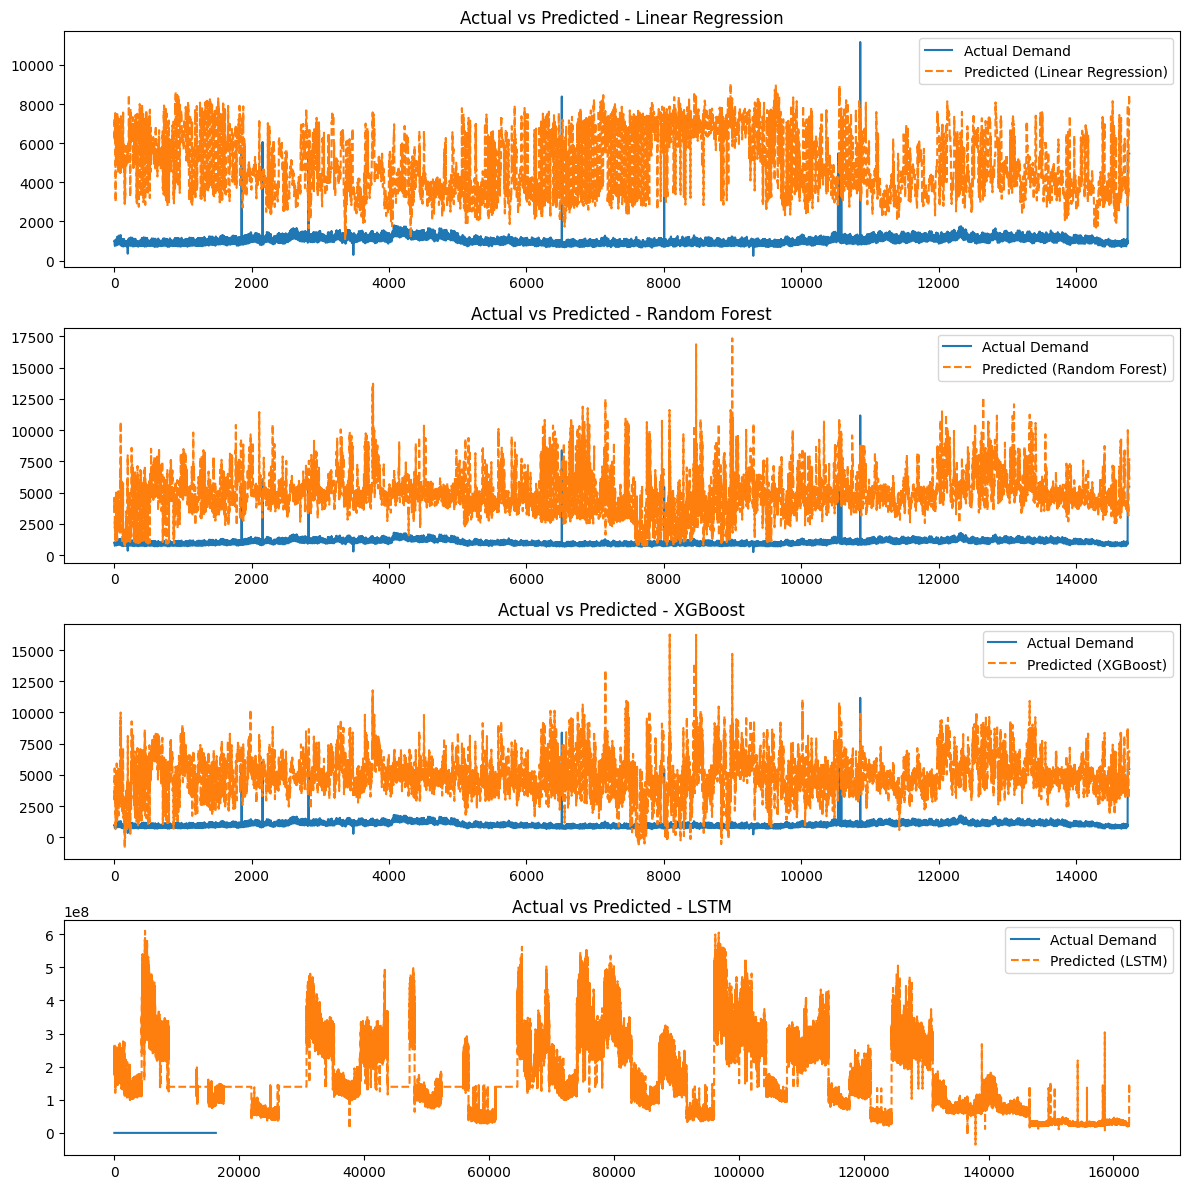

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Linear Regression
plt.subplot(4, 1, 1)
plt.plot(y_test.values, label='Actual Demand')
plt.plot(y_pred_lr, label='Predicted (Linear Regression)', linestyle='--')
plt.title('Actual vs Predicted - Linear Regression')
plt.legend()

# Random Forest
plt.subplot(4, 1, 2)
plt.plot(y_test.values, label='Actual Demand')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', linestyle='--')
plt.title('Actual vs Predicted - Random Forest')
plt.legend()

# XGBoost
plt.subplot(4, 1, 3)
plt.plot(y_test.values, label='Actual Demand')
plt.plot(y_pred_xg, label='Predicted (XGBoost)', linestyle='--')
plt.title('Actual vs Predicted - XGBoost')
plt.legend()

# LSTM
plt.subplot(4, 1, 4)
plt.plot(y_test_lstm_actual, label='Actual Demand')
plt.plot(lstm_predictions_actual, label='Predicted (LSTM)', linestyle='--')
plt.title('Actual vs Predicted - LSTM')
plt.legend()

plt.tight_layout()
plt.show()


In [277]:
import pickle
from tensorflow.keras.models import Sequential

# Save RandomForest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xg_model, f)

# Save Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)


# After training
LSTMmodel.save('lstm_model.h5') 

import joblib

# Save the models
joblib.dump(scalerPCA, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(kmeans, 'kmeans_k4.pkl')


['kmeans_k4.pkl']